# 3 - Process
After removing the empty values from the dataset, now I want to fix everything to use it on the next steps.
To achieve it, I want to get the columns into their appropiate types:

In [103]:
import pandas as pd
import numpy as np


In [104]:
# data = pd.read_csv('data\movies_clean.csv')
data = pd.read_csv('data\sample_clean.csv')

In [105]:
data.dtypes

tconst             object
primaryTitle       object
isAdult             int64
startYear           int64
runtimeMinutes     object
rating            float64
genres.1           object
mpaa               object
description        object
votes             float64
dtype: object

The first two columns won't be used for modelling, but I want to keep them as they have the name and id of each movie.

### ``isAdult``

In [106]:
data.isAdult.value_counts()

0    39610
1      177
Name: isAdult, dtype: int64

In [107]:
data.loc[data.isAdult == 1].head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,rating,genres.1,mpaa,description,votes
22124,tt0061926,Lust Weekend,1,1967,70,4.6,['drama'],Not Rated,"['David and Jane, a happily married couple, ar...",10.0
22412,tt0062417,Un épais manteau de sang,1,1968,88,6.6,['drama'],Not Rated,"[""Sorenson uses diamond robbery money to buy c...",14.0
22812,tt0063118,I Want You!,1,1969,59,5.4,['drama'],Not Rated,['Brothel madam blackmails her clients.'],13.0
22860,tt0063176,Karla,1,1969,80,5.3,"['drama', 'adult']",Not Rated,['Jackie and Lorna share a house in Florida. J...,8.0
23132,tt0063631,Space Thing,1,1968,70,4.1,"['comedy', 'sci-fi']",Unrated,"['A man is in bed reading Sci-Fi mags, and his...",258.0


In [108]:
data.loc[data['mpaa'] == 'X']

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,rating,genres.1,mpaa,description,votes
18666,tt0056166,Lash of Lust,0,1972,\N,2.6,['western'],X,"[""The man who hears with his eyes and speaks w...",32.0
19971,tt0058264,Kiss Me Quick!,0,1964,70,4.9,"['comedy', 'horror', 'sci-fi']",X,"['Sterilox, asexual ambassador from a distant ...",352.0
21060,tt0060092,The Alley Tramp,0,1968,69,4.5,['drama'],X,"[""A teenage girl sets out on a sexual odyssey ...",282.0
21435,tt0060712,Mondo Topless,0,1966,60,4.8,['documentary'],X,['Completely topless. Completely uninhibited. ...,1206.0
21469,tt0060761,The Notorious Daughter of Fanny Hill,0,1966,74,3.5,"['comedy', 'drama']",X,"[""Kissy Hill, the daughter of a notorious mada...",140.0
...,...,...,...,...,...,...,...,...,...,...
38874,tt0154344,Red Hot Shot,0,1970,104,5.7,"['crime', 'thriller']",X,['Frank Berin (Michael Reardon) was removed fr...,139.0
39215,tt0197616,Las Vegas Girls,1,1983,81,4.2,['adult'],X,"[""Two detectives are hired to go to Las Vegas ...",19.0
39277,tt0196538,The Erotic Adventures of Lolita,1,1982,74,5.5,"['adult', 'comedy', 'drama']",X,"['Two best friends, young Lolita and slightly ...",221.0
39374,tt0276347,"My Secretary, I Love....",1,1973,47,3.2,"['adult', 'comedy']",X,['J.J. Sachs cheats on his wife with his secre...,10.0


In this sample, the flag for adult is very biased, which make sense, as that kind of movies don't come up often. Besides, this category should be already covered by the MPAA ratings on its own column.
In the end, my decission is thtat this column is not needed.

In [109]:
cols_to_drop = []
cols_to_drop.append('isAdult')

### ``startYear``
This column is ok, but I want to keep a copy apart for visualization purposes.

In [110]:
data['year_process'] = data.startYear

### ``runtimeMinutes``

In [111]:
data.runtimeMinutes.value_counts(dropna=False)

90     2055
95     1282
85     1140
100    1085
80     1057
       ... 
239       1
328       1
218       1
305       1
222       1
Name: runtimeMinutes, Length: 264, dtype: int64

In the original source, the empty values were marked as '\N' instead of NaN. There are two consequences from this: they did not show up in the cleanup fase, and because of them, the solumn is considered as made of objects instead of only numbers.
I could assign them the most common value, or the mean value. In this case, I am choosing the mean.

In [112]:
mean = int(np.floor(data.loc[data['runtimeMinutes'] != '\\N']['runtimeMinutes'].astype('int32').mean()))
mean

91

In [113]:
data.runtimeMinutes = data.runtimeMinutes.replace('\\N', mean).astype('int32')
data.runtimeMinutes.value_counts(dropna=False)

90     2055
91     1881
95     1282
85     1140
100    1085
       ... 
239       1
328       1
218       1
305       1
222       1
Name: runtimeMinutes, Length: 263, dtype: int64

In [114]:
data.dtypes

tconst             object
primaryTitle       object
isAdult             int64
startYear           int64
runtimeMinutes      int32
rating            float64
genres.1           object
mpaa               object
description        object
votes             float64
year_process        int64
dtype: object

### ``genres.1``
In here, the first thing I must do is change the name to remove that .1.

In [115]:
data.rename(columns={'genres.1':'genres'}, inplace=True)

In [116]:
data.head(1)

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,rating,genres,mpaa,description,votes,year_process
0,tt0023526,Stranger in Town,0,1932,65,6.1,['drama'],TV-PG,"[""Ulysses Crickle owns a small town grocery st...",115.0,1932


(use the functions in NLP to create the columns here)

### ``mpaa``
The age rating has a list of defined values: 
* **G – General Audiences**
* **PG – Parental Guidance Suggested**
* **PG-13 – Parents Strongly Cautioned**
* **R – Restricted**
* **NC-17 – Adults Only**  
  
I want to minimize the amount of unique values present in the column.

In [117]:
data.mpaa.value_counts(dropna=False)

Not Rated    24356
Approved      6101
Passed        3607
R             1816
PG             701
TV-PG          537
Unrated        528
G              422
PG-13          359
TV-14          295
GP             225
TV-G           221
X              216
TV-MA          215
M               92
M/PG            60
TV-Y7           13
NC-17            9
TV-Y7-FV         5
TV-Y             4
Open             2
TV-13            2
E                1
Name: mpaa, dtype: int64

Not Rated and Unrated are going to be the same:

In [118]:
data.mpaa = data.mpaa.replace('Unrated', 'Not Rated')

Approved and Passed are going to be the same:

In [119]:
data.mpaa = data.mpaa.replace('Passed', 'Approved')

X, M, M/PG and TV-MA are going to be NC-17

In [120]:
data.mpaa = data.mpaa.replace(dict.fromkeys(['X','M','M/PG','TV-MA'], 'NC-17'))

TV-PG, GP, TV-Y7 and TV-Y7-FV are going to be PG

In [121]:
data.mpaa = data.mpaa.replace(dict.fromkeys(['TV-PG','GP','TV-Y7','TV-Y7-FV'], 'PG'))

TV-G, TV-Y, E and Open are going to be G

In [122]:
data.mpaa = data.mpaa.replace(dict.fromkeys(['TV-G','TV-Y','Open', 'E'], 'G'))

TV-14 and TV-13 are going to be PG-13

In [123]:
data.mpaa = data.mpaa.replace(dict.fromkeys(['TV-14','TV-13'], 'PG-13'))

In [124]:
data.mpaa.value_counts(dropna=False)

Not Rated    24884
Approved      9708
R             1816
PG            1481
PG-13          656
G              650
NC-17          592
Name: mpaa, dtype: int64

In [125]:
data.dtypes

tconst             object
primaryTitle       object
isAdult             int64
startYear           int64
runtimeMinutes      int32
rating            float64
genres             object
mpaa               object
description        object
votes             float64
year_process        int64
dtype: object

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns 

## Outliers
I want to check if there are any outliers on the dataset:

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_process'>

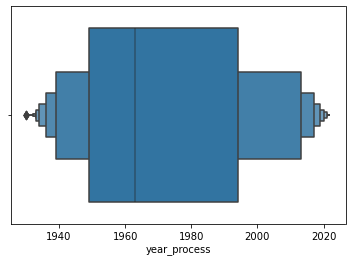

In [127]:
sns.boxenplot(data.year_process)

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtimeMinutes'>

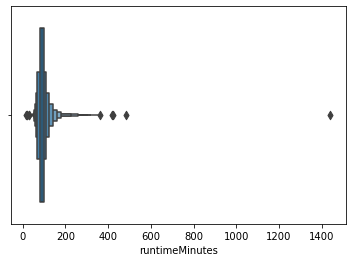

In [128]:
sns.boxenplot(data.runtimeMinutes)

In [129]:
data.sort_values(by='runtimeMinutes', ascending=False).head(5)

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,rating,genres,mpaa,description,votes,year_process
28771,tt2008009,The Clock,0,2010,1440,9.0,['drama'],PG,['Scenes from various films and TV programs th...,321.0,2010
38780,tt4842296,A Lullaby to the Sorrowful Mystery,0,2016,485,7.5,"['adventure', 'drama', 'fantasy']",Not Rated,['The search for the body of Andres Bonifacio....,293.0,2016
23234,tt0063794,War and Peace,0,1965,422,8.3,"['drama', 'history', 'romance', 'war']",PG,['The Russian aristocracy prepares for the Fre...,7091.0,1965
29473,tt3106498,Earth at Risk: Building a Resistance Movement ...,0,2011,416,7.9,['documentary'],Not Rated,['Earth at Risk is an annual conference featur...,13.0,2011
32983,tt8232682,"Freddie Mercury: Lover of Life, Singer of Songs",0,2006,360,8.2,"['documentary', 'music']",Not Rated,"[""Features 'The Untold Story' Documentary and ...",28.0,2006


There is a clear outlier here even though it is not a mistake. But still, I should remove it just to improve accuracy.

In [130]:
data = data.drop(data['runtimeMinutes'].idxmax())

In [131]:
data.sort_values(by='runtimeMinutes', ascending=False).head(1)

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,rating,genres,mpaa,description,votes,year_process
38780,tt4842296,A Lullaby to the Sorrowful Mystery,0,2016,485,7.5,"['adventure', 'drama', 'fantasy']",Not Rated,['The search for the body of Andres Bonifacio....,293.0,2016


C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

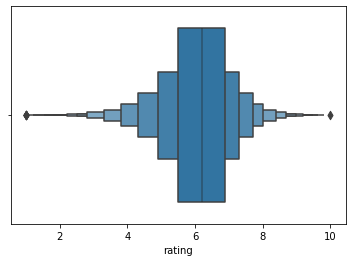

In [132]:
sns.boxenplot(data.rating)

Honestly, I think the rest of the outliers fit in what was expected from the dataset, so I will not treat them.

In [133]:
data.to_csv('data\imdb_processed.csv', index=False)

In [134]:
# non_model_info = data[['tconst', 'primaryTitle', 'startYear']]
# non_model_info.head(1)

In [135]:
# data = data.drop(['tconst', 'primaryTitle', 'startYear'], axis=1)
# data.head(1)

I also want to keep the target separated:

In [136]:
# target = data['rating']


In order to improve accuracy in the future model, I want to normalize the numerical data, and encode the categorical data.
Also, I have two columns that I want to treat differently.

In [137]:
numerical = data.select_dtypes(np.number)
text = data[['genres', 'description']]
categorical = data['mpaa']